# ABOUT THIS PROJECT:

## This data is obtained through the Kaggle website from the following link:
## https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh

### This dataset contains various independent features such as the Airline name, Date of Journey, route, departure and arrival time etc. 
### Based on these independent features, we have to predict the independent feature, that is the price of the ticket.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#Importing the necessary libraries for the project

In [2]:
train = pd.read_excel("Data_Train.xlsx")

#Loading the training dataset

# BASIC EXPLORATORY DATA ANALYSIS OF THE TRAIN SET: 

In [3]:
train.shape

(10683, 11)

In [4]:
#We can see that the training set has 10683 rows and 11 columns

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
pd.set_option('display.max_columns',11)

In [7]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [15]:
train.isnull().any()

# We find that in the 'Route' & 'Total_stops' column, we have null values

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route               True
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops         True
Additional_Info    False
Price              False
dtype: bool

In [16]:
train.isna().sum()

# Hence, we find the number of null values in those particular columns

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
train[train['Route'].isna()]

# Displaying the record that has the null value in the 'Route' column.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [22]:
train[train['Total_Stops'].isna()]

# Displaying the record that has the null value in the 'Total_Stops'.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [23]:
# We find that the same record has both the null values in the dataframe.
# So dropping that one particular row from our dataframe will have next to zero impact on our prediction.

In [26]:
train.dropna(inplace = True)

In [28]:
train.shape

# We see that after dropping that particular row from our dataframe we have 10682 records instead of 10683 rows.

(10682, 11)

In [29]:
train.isnull().any()

#Now we dont have any Null values

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [31]:
# We see again that we dont have any null values in our dataframe.
# And that we have only one integer column, and that is the column we have to predict. 

In [32]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# NOW WE WILL HANDLE EACH AND EVERY COLUMN ONE BY ONE

## HANDLING THE 'Additional_Info' Column

In [33]:
train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [35]:
percent_of_noinfo = ((8344 + 3)/10682)*100
percent_of_noinfo

78.14079760344505

In [36]:
# We can see that the Additional_Info columns has close to 80% of no info values. 
# So we drop the column, as it cant have a large scale affect on our prediction 

In [38]:
train.drop('Additional_Info', axis = 'columns', inplace = True)

In [39]:
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [49]:
# Thus we see that the Additional Info column has been deleted from our dataset

## HANDLING THE 'Total_Stops' COLUMN

In [40]:
train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
# We can replace the non-stop value by 0 and replace the other data by the corresponding numbers.

train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [43]:
train['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of flights')

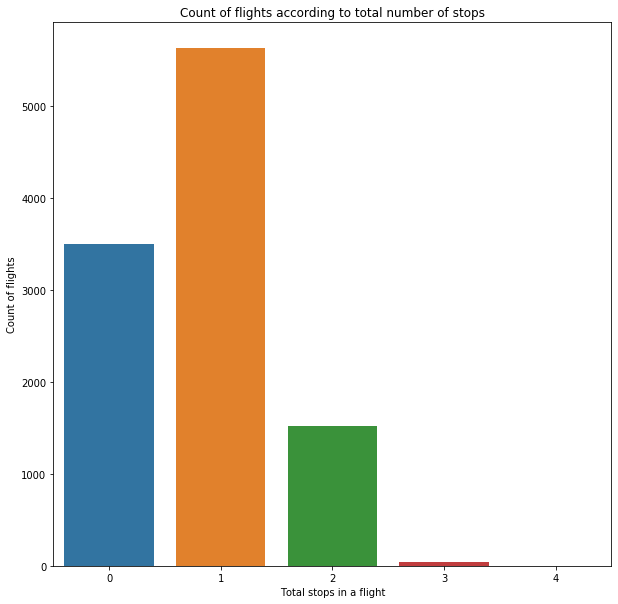

In [46]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights according to total number of stops')
sns.countplot(x = 'Total_Stops', data = train)
plt.xlabel('Total stops in a flight')
plt.ylabel('Count of flights')

In [47]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,13302


In [48]:
train.Total_Stops.dtype

dtype('int64')

In [50]:
# Thus we see that the 'total_stops' column has been updated, and also the data type of the column has changed from 
# 'object' to 'integer'

## HANDLING THE 'ROUTE' COLUMN

In [51]:
# As we can see that the Route column is related to Total_Stops column, therefore we dont need this column. 
# Hence we can drop the column from our dataset. 

In [52]:
train.drop('Route', axis = 'columns', inplace = True)

In [53]:
train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302
...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648


In [54]:
# Hence we see that the 'Route' column has been deleted from our dataset

In [61]:
strin = "24/03/2019"
new = strin.split()

In [62]:
new

['24/03/2019']

In [66]:
new1 = strin.split('/')
new1

['24', '03', '2019']

In [68]:
new2 = strin.split('/')[0]
new2

'24'

## HANDLING THE Date_of_journey COLUMN

In [69]:
train['journey_day'] = train['Date_of_Journey'].split('/')[0]

AttributeError: 'Series' object has no attribute 'split'

In [72]:
train['journey_day'] = train['Date_of_Journey'].str.split('/')[0]

ValueError: Length of values does not match length of index

In [73]:
train['journey_day'] = train['Date_of_Journey'].str.split('/').str[0]

In [74]:
train['journey_day']

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: journey_day, Length: 10682, dtype: object

In [76]:
train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,01
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229,27
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,01


In [75]:
# We created a new column 'journey_day' in our dataframe 
# This column stores the day of the journey

In [77]:
train['journey_month'] = train['Date_of_Journey'].str.split('/').str[1]

In [78]:
train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,01,03
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,04
10679,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,04
10680,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,0,7229,27,04
10681,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,01,03


In [79]:
# We created a new column 'journey_month' in our dataframe 
# This column stores the month of the journey

In [80]:
# We dont need to create the journey_year column as all the records are of the year 2019

In [81]:
# Now we dont need our original "Date_of_Journey" column as we have stored the values in newly made columns
# So we delete the column from our dataframe

In [82]:
train.drop('Date_of_Journey', axis = 'columns', inplace = True)

In [83]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,03
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,05
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,06
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,01,03
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,04
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,04
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,7229,27,04
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,01,03


In [84]:
# Hence we can see that the Date_of_journey column has been deleted from our dataframe

In [85]:
train.journey_month.dtype

dtype('O')

In [97]:
# The newly created columns are of string datatype.
# So we need to convert the strings to integers.

In [93]:
train['journey_day'] = train['journey_day'].astype(int)

In [94]:
train['journey_month'] = train['journey_month'].astype(int)

In [95]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,1,3


In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
Airline          10682 non-null object
Source           10682 non-null object
Destination      10682 non-null object
Dep_Time         10682 non-null object
Arrival_Time     10682 non-null object
Duration         10682 non-null object
Total_Stops      10682 non-null int64
Price            10682 non-null int64
journey_day      10682 non-null int32
journey_month    10682 non-null int32
dtypes: int32(2), int64(2), object(6)
memory usage: 1.1+ MB


In [98]:
# Now we can see that the strings have been converted to integers

In [99]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,0,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,1,3
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,9,4
10679,Air India,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,27,4
10680,Jet Airways,Banglore,Delhi,08:20,11:20,3h,0,7229,27,4
10681,Vistara,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,1,3


<IPython.core.display.Javascript object>

Text(0, 0.5, 'Count of flights')

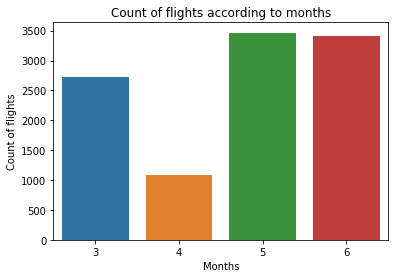

In [106]:
#plt.figure(figsize = (10, 10))
plt.title('Count of flights according to months')
sns.countplot(x = 'journey_month', data = train)
plt.xlabel('Months')
plt.ylabel('Count of flights')

In [107]:
# The plot only shows for 4 months because out dataset contains the records of these 4 months only

## HANDLING THE dep_time COLUMN

In [108]:
strin = "22:20"
new = strin.split(':')[0]
new

'22'

In [116]:
strinn = "01:10 22 Mar"
new1 = strinn[3:5]
new1

'10'

In [117]:
train['deptime_hour'] = train['Dep_Time'].str.split(':').str[0]

In [118]:
train['deptime_min'] = train['Dep_Time'].str.split(':').str[1]

In [119]:
train

,Airline,Source,Destination,Dep_Time,Arrival_Time,...,Price,journey_day,journey_month,deptime_hour,deptime_min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,...,3897,24,3,22,20
1,Air India,Kolkata,Banglore,05:50,13:15,...,7662,1,5,05,50
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,...,13882,9,6,09,25
3,IndiGo,Kolkata,Banglore,18:05,23:30,...,6218,12,5,18,05
4,IndiGo,Banglore,New Delhi,16:50,21:35,...,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,19:55,22:25,...,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,20:45,23:20,...,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,08:20,11:20,...,7229,27,4,08,20
10681,Vistara,Banglore,New Delhi,11:30,14:10,...,12648,1,3,11,30


In [120]:
train['deptime_hour'] = train['deptime_hour'].astype(int)

In [121]:
train['deptime_min'] = train['deptime_min'].astype(int)

In [122]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
Airline          10682 non-null object
Source           10682 non-null object
Destination      10682 non-null object
Dep_Time         10682 non-null object
Arrival_Time     10682 non-null object
Duration         10682 non-null object
Total_Stops      10682 non-null int64
Price            10682 non-null int64
journey_day      10682 non-null int32
journey_month    10682 non-null int32
deptime_hour     10682 non-null int32
deptime_min      10682 non-null int32
dtypes: int32(4), int64(2), object(6)
memory usage: 1.2+ MB


In [123]:
# Now we dont need the original Dep_Time column. 
# So we drop that column

train.drop('Dep_Time', axis = 'columns', inplace = True)

In [124]:
train

,Airline,Source,Destination,Arrival_Time,Duration,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,0,3897,24,3,22,20
1,Air India,Kolkata,Banglore,13:15,7h 25m,2,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,2,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,1,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,1,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,0,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,23:20,2h 35m,0,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,11:20,3h,0,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,0,12648,1,3,11,30


## HANDLING THE Arrival_Time COLUMN

In [130]:
train['Arrival_Time'].str[3:5]

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Time, Length: 10682, dtype: object

In [131]:
train['Arrival_Time'].str[0:2]

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10682, dtype: object

In [132]:
train['arrival_hour'] = train['Arrival_Time'].str[0:2]


In [133]:
train['arrival_min'] = train['Arrival_Time'].str[3:5]

In [134]:
train

,Airline,Source,Destination,Arrival_Time,Duration,...,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,01:10 22 Mar,2h 50m,...,3,22,20,01,10
1,Air India,Kolkata,Banglore,13:15,7h 25m,...,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,04:25 10 Jun,19h,...,6,9,25,04,25
3,IndiGo,Kolkata,Banglore,23:30,5h 25m,...,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,21:35,4h 45m,...,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,22:25,2h 30m,...,4,19,55,22,25
10679,Air India,Kolkata,Banglore,23:20,2h 35m,...,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,11:20,3h,...,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,14:10,2h 40m,...,3,11,30,14,10


In [135]:
train['arrival_min'].value_counts()

00    1447
25    1301
15    1286
35    1111
20     902
30     832
50     750
45     697
05     660
40     629
10     577
55     490
Name: arrival_min, dtype: int64

In [136]:
train['arrival_hour'] = train['arrival_hour'].astype(int)

In [137]:
train['arrival_min'] = train['arrival_min'].astype(int)

In [138]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
Airline          10682 non-null object
Source           10682 non-null object
Destination      10682 non-null object
Arrival_Time     10682 non-null object
Duration         10682 non-null object
Total_Stops      10682 non-null int64
Price            10682 non-null int64
journey_day      10682 non-null int32
journey_month    10682 non-null int32
deptime_hour     10682 non-null int32
deptime_min      10682 non-null int32
arrival_hour     10682 non-null int32
arrival_min      10682 non-null int32
dtypes: int32(6), int64(2), object(5)
memory usage: 1.2+ MB


In [139]:
# Now we dont need the original Arrival_Time column, so we drop it from our dataset

train.drop('Arrival_Time', axis='columns', inplace = True)

In [140]:
train

,Airline,Source,Destination,Duration,Total_Stops,...,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,...,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,...,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,...,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,...,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,...,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,...,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0,...,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0,...,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,0,...,3,11,30,14,10


In [141]:
pd.set_option('display.max_columns', 100)

In [142]:
train

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,14,10


## HANDLING THE Duration COLUMN

In [143]:
strin = "2h 40m"
strin.split(" ")[0][0]

'2'

In [144]:
strin.split(" ")[0][1]

'h'

In [179]:
strin.strip()[3]

'4'

In [175]:
strin.split(" ")[1][2]

'm'

In [189]:
strin.split(sep = "m")[0]

'2h 40'

In [190]:
strin.split(sep='m')[0].split()

['2h', '40']

In [191]:
strin.split(sep='m')[0].split()[1]

'40'

In [194]:
duration_list = list(train['Duration'])

In [195]:
duration_list

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [196]:
for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration_list[i]:
            duration_list[i] = duration_list[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration_list[i] = "0h " + duration_list[i]           # Adds 0 hour

In [197]:
duration_hours = []
duration_mins = []
for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration_list[i].split(sep = "m")[0].split()[1]))   # Extracts only minutes from duration

In [198]:
train["Duration_hours"] = duration_hours
train["Duration_mins"] = duration_mins

In [199]:
train

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,2h 30m,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,2h 35m,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,3h,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,2h 40m,0,12648,1,3,11,30,14,10,2,40


In [200]:
# Now we dont need our original Duration column, so we drop it.

train.drop('Duration', axis = 'columns', inplace=True)

In [201]:
train

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


## HANDLING THE AIRLINE COLUMN

In [203]:
train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [204]:
airlines = train['Airline']

In [205]:
airlines = pd.get_dummies(airlines, drop_first = True)


# WE created another dataframe which consisted just of the airline column.
#Then we performed ONE HOT ENCODING on it, by using the get_dummies function of pandas.
# drop_first = true, suggests that first column must be dropped
#so, that we dont fall in to the dummy variable trap.




###### To know what is dummy variable trap, visit the following link.
###### https://www.algosome.com/articles/dummy-variable-trap-regression.html#:~:text=The%20Dummy%20Variable%20trap%20is,%2Ffemale)%20as%20an%20example.

In [206]:
airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [207]:
# drop_first = True, dropped the jet airways column

## HANDLING THE SOURCE AND DESTINATION COLUMNS

In [208]:
source = train['Source']
destination = train['Destination']

source = pd.get_dummies(source, drop_first=True)
destination = pd.get_dummies(destination, drop_first=True)

In [209]:
# We got dummies for the source and destination columns as well. 

In [211]:
train_new = pd.concat([train, airlines, source, destination], axis=1)

In [212]:
train_new.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [213]:
# We dont need the original Airlines, source and destination columns. 
#So we drop them.

train_new.drop(['Airline','Source','Destination'], axis='columns', inplace = True)

In [214]:
train_new.head()

,Total_Stops,Price,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [215]:
train_new.shape

(10682, 30)

# TEST DATA 

In [217]:
test = pd.read_excel("Test_set.xlsx")

#Loading the test dataset

In [218]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [219]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [220]:
# The test set has no null values

In [224]:
test.shape

(2671, 10)

In [225]:
print("TEST DATA PREPROCESSING")
print('_'*75)

print("Shape of the test data before preprocessing is {}".format(test.shape))

# Dropping Additional info and route column
test.drop(['Additional_Info','Route'], axis='columns', inplace = True)

# Encoding the Total_Stops Column
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)




### Date of journey column
test['journey_day'] = test['Date_of_Journey'].str.split('/').str[0]

test['journey_month'] = test['Date_of_Journey'].str.split('/').str[1]

test.drop(["Date_of_Journey"], axis = 1, inplace = True)

test['journey_day'] = test['journey_day'].astype(int)

test['journey_month'] = test['journey_month'].astype(int)



### Dept time Column
test['deptime_hour'] = test['Dep_Time'].str.split(':').str[0]

test['deptime_min'] = test['Dep_Time'].str.split(':').str[1]

test['deptime_hour'] = test['deptime_hour'].astype(int)

test['deptime_min'] = test['deptime_min'].astype(int)

test.drop('Dep_Time', axis = 'columns', inplace = True)



### Arrival time column
test['arrival_hour'] = test['Arrival_Time'].str[0:2]

test['arrival_min'] = test['Arrival_Time'].str[3:5]

test['arrival_hour'] = test['arrival_hour'].astype(int)

test['arrival_min'] = test['arrival_min'].astype(int)

test.drop('Arrival_Time', axis='columns', inplace = True)


### Duration Column
duration_list = list(test['Duration'])

for i in range(len(duration_list)):
    if len(duration_list[i].split()) != 2:    
        if "h" in duration_list[i]:
            duration_list[i] = duration_list[i].strip() + " 0m"  
        else:
            duration_list[i] = "0h " + duration_list[i]           

            
duration_hours = []
duration_mins = []
for i in range(len(duration_list)):
    duration_hours.append(int(duration_list[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration_list[i].split(sep = "m")[0].split()[1]))   # Extracts only minutes from duration

test["Duration_hours"] = duration_hours
test["Duration_mins"] = duration_mins
test.drop('Duration', axis = 'columns', inplace=True)


### Airline column

airlines = test['Airline']

airlines = pd.get_dummies(airlines, drop_first = True)

### Source and Destination Columns

source = test['Source']
destination = test['Destination']

source = pd.get_dummies(source, drop_first=True)
destination = pd.get_dummies(destination, drop_first=True)


#Concatenating the newly obtained airlines, source and destination columns with our previous test dataframe
test_new = pd.concat([test, airlines, source, destination], axis=1)

#Dropping the columns from the test set that are no longer required
test_new.drop(['Airline','Source','Destination'], axis='columns', inplace = True)

print("Shape of test data after preprocessing is {}".format(test_new.shape))

TEST DATA PREPROCESSING
___________________________________________________________________________
Shape of the test data before preprocessing is (2671, 10)
Shape of test data after preprocessing is (2671, 28)


In [226]:
test_new.columns

Index(['Total_Stops', 'journey_day', 'journey_month', 'deptime_hour',
       'deptime_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [227]:
test_new.head()

,Total_Stops,journey_day,journey_month,deptime_hour,deptime_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [228]:
y = train['Price']

In [235]:
X = train_new.drop('Price', axis = 'columns')

<IPython.core.display.Javascript object>

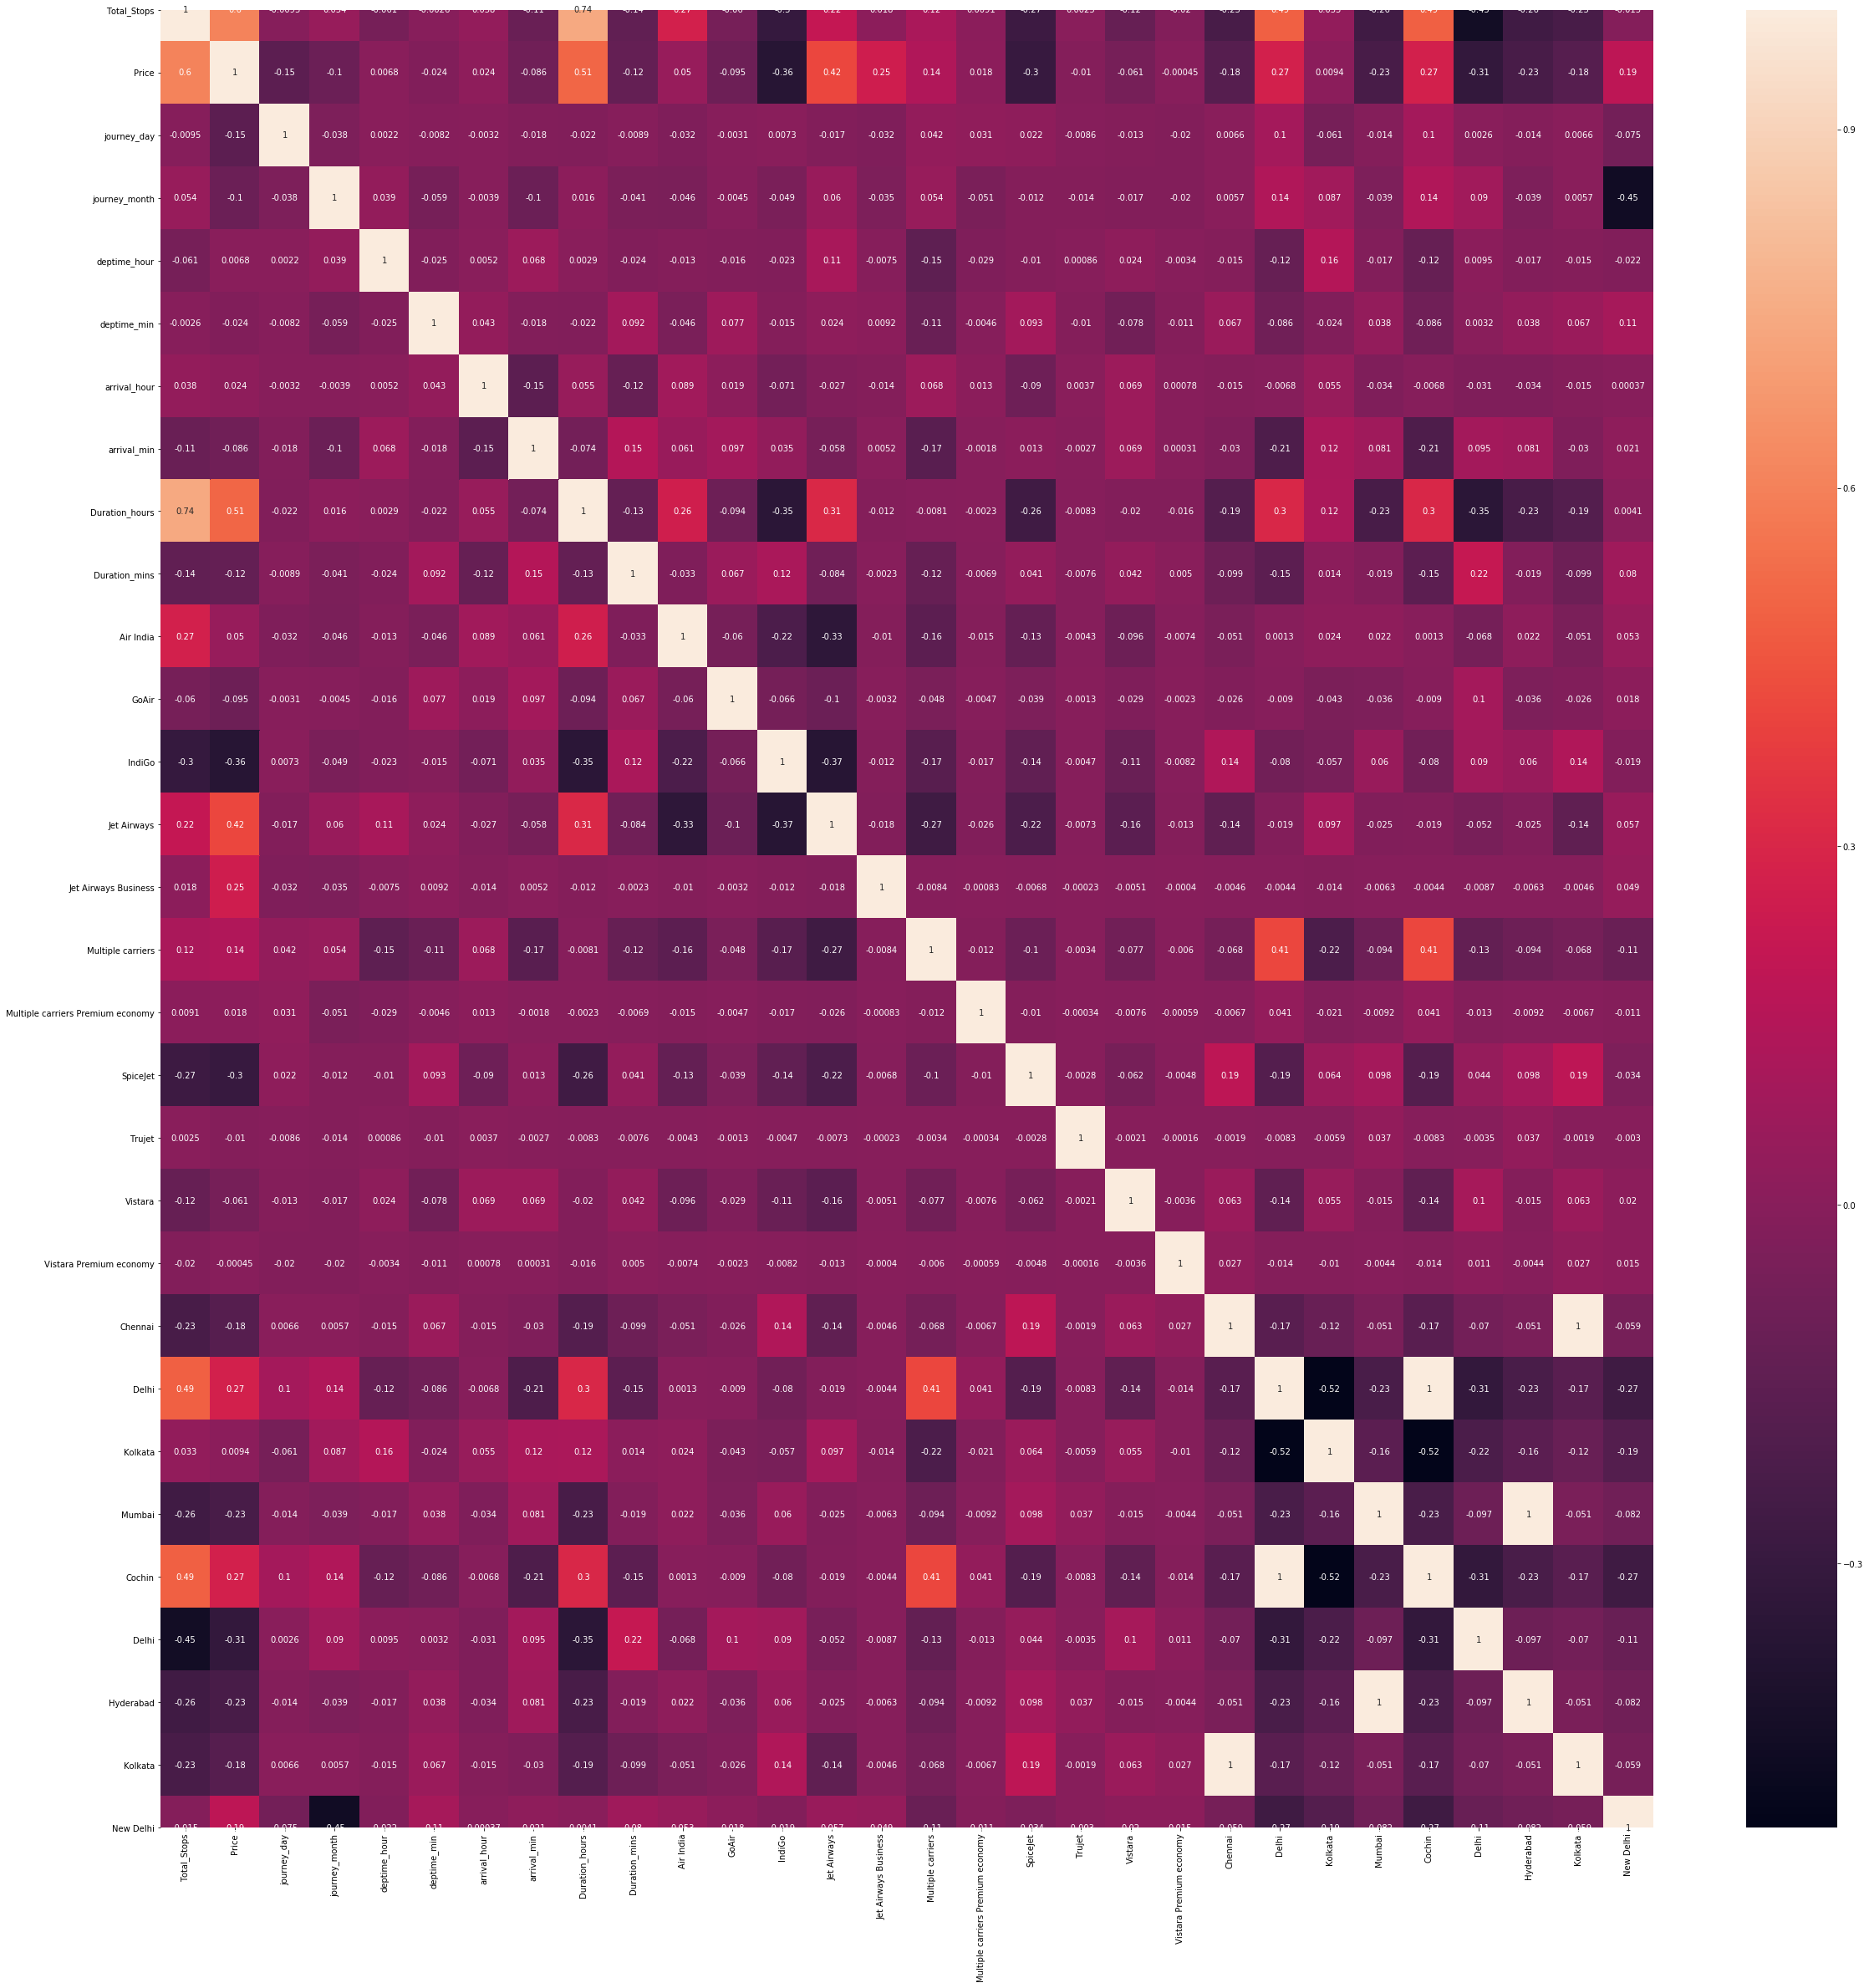

In [230]:
plt.figure(figsize = (40,40))
sns.heatmap(train_new.corr(),annot = True)

In [231]:
from sklearn.model_selection import train_test_split

In [236]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## TRYING THE MODEL THROUGH THE K NEIGHBORS REGRESSOR

In [233]:
from sklearn.neighbors import KNeighborsRegressor

In [237]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [238]:
knr.score(x_train, y_train)

0.7282452651922473

In [239]:
knr.score(x_test, y_test)

0.6149235467071228

## TRYING THE MODEL THROUGH THE DECISION TREE REGRESSOR

In [240]:
from sklearn.tree import DecisionTreeRegressor

In [241]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [242]:
dtr.score(x_train, y_train)

0.9712655453054742

In [243]:
dtr.score(x_test, y_test)

0.7253262000111249

## TRYING THE MODEL THROUGH THE RANDOM FOREST REGRESSOR

In [244]:
from sklearn.ensemble import RandomForestRegressor

In [252]:
rfr = RandomForestRegressor(n_estimators = 900)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=900)

In [253]:
rfr.score(x_train, y_train)

0.9551057655501956

In [254]:
rfr.score(x_test, y_test)

0.8272786208161673

# SO, WE SAW THAT OUT OF THESE THREE REGRESSION MODELS, RANDOM FOREST REGRESSOR GOT US THE BEST PREDICTION SCORE OF 82.7%

## FURTHER MORE, WE CAN USE MORE EFFICIENT MODELS LIKE THE XGBOOST REGRESSOR TO INCREASE THE SCORE
## AND ALSO, WE CAN PERFORM HYPER PARAMETER TUNING ON OUR CURRENT MODELS TO FURTHER INCREASE THE SCORE.